## Project 3 

## Part 3 Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

In [5]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('white')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# h2 : updated house data
house = pd.read_csv('h2.csv')

del house['Unnamed: 0']
house.columns

Index([u'id', u'mssubclass', u'mszoning', u'lotfrontage', u'lotarea',
       u'street', u'lotshape', u'landcontour', u'utilities', u'lotconfig',
       u'landslope', u'neighborhood', u'condition1', u'condition2',
       u'bldgtype', u'housestyle', u'overallqual', u'overallcond',
       u'yearbuilt', u'yearremodadd', u'roofstyle', u'roofmatl',
       u'exterior1st', u'exterior2nd', u'exterqual', u'extercond',
       u'foundation', u'bsmtqual', u'bsmtcond', u'bsmtexposure',
       u'bsmtfintype1', u'bsmtfinsf1', u'bsmtfintype2', u'bsmtfinsf2',
       u'bsmtunfsf', u'totalbsmtsf', u'heating', u'heatingqc', u'centralair',
       u'electrical', u'1stflrsf', u'2ndflrsf', u'lowqualfinsf', u'grlivarea',
       u'bsmtfullbath', u'bsmthalfbath', u'fullbath', u'halfbath',
       u'bedroomabvgr', u'kitchenabvgr', u'kitchenqual', u'totrmsabvgrd',
       u'functional', u'fireplaces', u'fireplacequ', u'garagetype',
       u'garagefinish', u'garagecars', u'garagearea', u'garagequal',
       u'garageco

## Selecting Renovatable Features


|Renovatable Predictor   |Description   |   
|---|
| overallcond  | the overall condition of the house 10: very excellent, 1: very poor |   
|  exterqual | quality of material on the exterior  |   
| extercond  | present condition of the ext material  |   
|bsmtcond |general condition of basement |
|heatingqc | heating quality and condition |
|kitchenqual | kitchen quality |
|||

###  Not including these as renovatable predictors as they also have a binary condition available or none and therefore not comparable

|Renovatable Predictor   |Description   |   
|---|
| fence  | fence quality |   
|  poolqc | pool quality |   
| garagecond  | garage condition  |   
|fireplacequ |fireplace quality |
|||


In [6]:
# Understand the renovatable features
print house['overallcond'].unique(),'\n'
print house['exterqual'].unique(),'\n'
print house['extercond'].unique(),'\n'
print house['bsmtcond'].unique(),'\n'
print house['heatingqc'].unique(),'\n'
print house['kitchenqual'].unique(),'\n'

[5 8 6 7 4 3 9 2 1] 

['Gd' 'TA' 'Ex' 'Fa'] 

['TA' 'Gd' 'Fa' 'Po' 'Ex'] 

['TA' 'Gd' 'No' 'Fa' 'Po'] 

['Ex' 'Gd' 'TA' 'Fa' 'Po'] 

['Gd' 'TA' 'Ex' 'Fa'] 



In [7]:
reno_dummy = pd.get_dummies(house, columns = ['overallcond','exterqual','extercond','bsmtcond','heatingqc','kitchenqual'],
                           prefix = ['overallcond','exterqual','extercond','bsmtcond','heatingqc','kitchenqual'])

c = list(reno_dummy.columns)
c

['id',
 'mssubclass',
 'mszoning',
 'lotfrontage',
 'lotarea',
 'street',
 'lotshape',
 'landcontour',
 'utilities',
 'lotconfig',
 'landslope',
 'neighborhood',
 'condition1',
 'condition2',
 'bldgtype',
 'housestyle',
 'overallqual',
 'yearbuilt',
 'yearremodadd',
 'roofstyle',
 'roofmatl',
 'exterior1st',
 'exterior2nd',
 'foundation',
 'bsmtqual',
 'bsmtexposure',
 'bsmtfintype1',
 'bsmtfinsf1',
 'bsmtfintype2',
 'bsmtfinsf2',
 'bsmtunfsf',
 'totalbsmtsf',
 'heating',
 'centralair',
 'electrical',
 '1stflrsf',
 '2ndflrsf',
 'lowqualfinsf',
 'grlivarea',
 'bsmtfullbath',
 'bsmthalfbath',
 'fullbath',
 'halfbath',
 'bedroomabvgr',
 'kitchenabvgr',
 'totrmsabvgrd',
 'functional',
 'fireplaces',
 'fireplacequ',
 'garagetype',
 'garagefinish',
 'garagecars',
 'garagearea',
 'garagequal',
 'garagecond',
 'paveddrive',
 'wooddecksf',
 'openporchsf',
 'enclosedporch',
 '3ssnporch',
 'screenporch',
 'poolarea',
 'poolqc',
 'fence',
 'miscfeature',
 'miscval',
 'mosold',
 'yrsold',
 'saletyp

In [8]:
reno_dummy = reno_dummy[reno_dummy.yrsold != 2010]
reno_dummy['yrsold'].value_counts()



2009    336
2007    328
2006    312
2008    302
Name: yrsold, dtype: int64

In [14]:
y_train = reno_dummy['saleprice']
X_train = reno_dummy[['overallcond_2','overallcond_3','overallcond_4','overallcond_5',
 'overallcond_6','overallcond_7','overallcond_8','overallcond_9','exterqual_Ex', 'exterqual_Fa', 'exterqual_Gd', 'extercond_Ex',
       'extercond_Fa', 'extercond_Gd', 'extercond_Po', 
       'bsmtcond_Fa', 'bsmtcond_Gd', 'bsmtcond_No', 'bsmtcond_Po',
        'heatingqc_Ex','heatingqc_Fa', 'heatingqc_Gd',
       'heatingqc_Po', 'kitchenqual_Ex', 'kitchenqual_Fa',
       'kitchenqual_Gd']].values

score 0.550299417383 

RMSE_train 53020.2684677


Text(0,0.5,u'Actual')

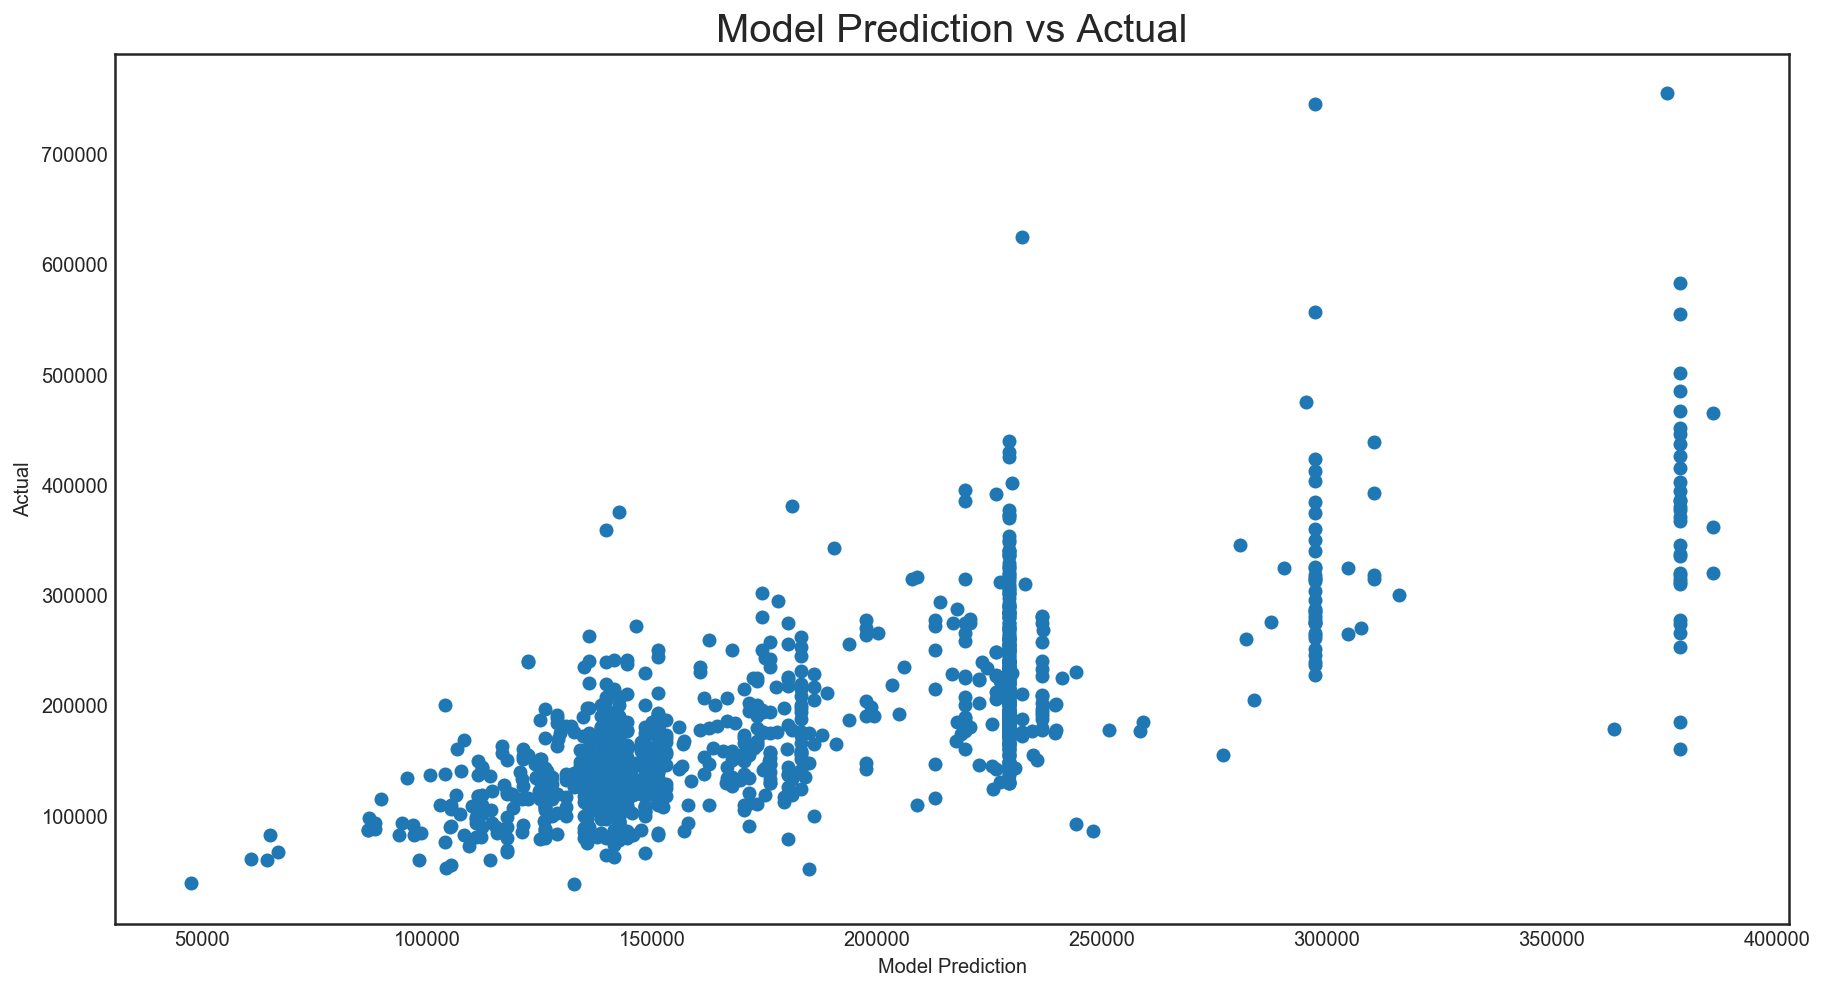

In [15]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

model_coef = model.coef_
predict = model.predict(X_train)
score = model.score(X_train,y_train)
RMSE_train = (mean_squared_error(y_train, predict))**0.5

print 'score', score,'\n'
print 'RMSE_train', RMSE_train

plt.figure(figsize=(15,8))
plt.scatter(predict, y_train)
plt.title('Model Prediction vs Actual', fontsize=20)
plt.xlabel ('Model Prediction')
plt.ylabel ('Actual')



In [16]:
X_col = ['overallcond','exterqual_Ex', 'exterqual_Fa', 'exterqual_Gd', 'exterqual_TA', 'extercond_Ex',
       'extercond_Fa', 'extercond_Gd', 'extercond_Po', 'extercond_TA',
       'bsmtcond_Fa', 'bsmtcond_Gd', 'bsmtcond_No', 'bsmtcond_Po',
       'bsmtcond_TA', 'heatingqc_Ex','heatingqc_Fa', 'heatingqc_Gd',
       'heatingqc_Po', 'heatingqc_TA','kitchenqual_Ex', 'kitchenqual_Fa',
       'kitchenqual_Gd','kitchenqual_TA']

model_coef = pd.DataFrame(zip(X_col,model.coef_), columns = ['reno_feature','coef']).sort_values(by =['coef'])
print 'Top 20 Renovatable Drivers','\n'
print model_coef.tail(10),'\n'
print model_coef.head(10)

Top 20 Renovatable Drivers 

      reno_feature           coef
13     bsmtcond_Po    2973.741699
16    heatingqc_Fa    7396.345544
5     extercond_Ex    7442.003279
19    heatingqc_TA    8570.045419
7     extercond_Gd    9219.598087
4     exterqual_TA   11301.365452
3     exterqual_Gd   14183.248141
10     bsmtcond_Fa   46254.835044
23  kitchenqual_TA   99664.278795
8     extercond_Po  127412.060828 

      reno_feature          coef
22  kitchenqual_Gd -52867.057899
18    heatingqc_Po -33985.807377
17    heatingqc_Gd -30560.133332
0      overallcond -20686.963318
15    heatingqc_Ex -13770.899861
9     extercond_TA -11759.828359
1     exterqual_Ex -10805.121184
20  kitchenqual_Ex  -7107.829267
6     extercond_Fa  -6139.698770
12     bsmtcond_No  -5742.098061


In [ ]:
### Interpreting the Renovatable Drivers

|Feature   | Description   |   
|---|
| Ex  | Excellent |   
|  Gd | Good |   
| TA  | Average/Typical  |   
| Fa | Fair |
|||

External Quality, External Condition are the top renovatable features